# Miami Housing Price Prediction

<i>You can find the Miami Housing Dataset by Deep Contractor on Kaggle: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset</i>.

<b>Purpose:</b> For exploratory as well as self-educative purposes. I'd like to do more machine learning on price datasets.

<b>Objective:</b> To study the effects of different (physical and time-related) features on housing prices in Miami.

## Information about dataset

According to the dataset's Kaggle data card, this dataset involves 13,932 single-family homes in Miami, FL.

Directly from the <b>Content</b> column under the data card, here are the columns:

* PARCELNO: unique identifier for each property. About 1% appear multiple times.
* SALE_PRC: sale price (USD)
* LND_SQFOOT: land area (square feet)
* TOT_LVG_AREA: floor area (square feet)
* SPEC_FEAT_VAL: value of special features (e.g., swimming pools) (USD)
* RAIL_DIST: distance to the nearest rail line (an indicator of noise) (feet)
* OCEAN_DIST: distance to the ocean (feet)
* WATER_DIST: distance to the nearest body of water (feet)
* CNTR_DIST: distance to the Miami central business district (feet)
* SUBCNTR_DI: distance to the nearest subcenter (feet)
* HWY_DIST: distance to the nearest highway (an indicator of noise) (feet)
* age: age of the structure
* avno60plus: dummy variable for airplane noise exceeding an acceptable level
* structure_quality: quality of the structure
* month_sold: sale month in 2016 (1 = jan)
* LATITUDE
* LONGITUDE

***

# Using R<sup>2</sup> Model for Predictions on Sale Price

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

from matplotlib.ticker import FuncFormatter

## Preprocessing data

In [3]:
df = pd.read_csv('/Users/gwynethnoel/Downloads/miami-housing.csv')

In [4]:
df

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


Since PARCELNO is a "unique identifier" according to the Data Card for this dataset, I will remove it from the table.

In [5]:
df.drop(['PARCELNO'], axis=1, inplace=True)

In [6]:
df

,LATITUDE,LONGITUDE,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


Reading info to check for null values:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   SALE_PRC           13932 non-null  float64
 3   LND_SQFOOT         13932 non-null  int64  
 4   TOT_LVG_AREA       13932 non-null  int64  
 5   SPEC_FEAT_VAL      13932 non-null  int64  
 6   RAIL_DIST          13932 non-null  float64
 7   OCEAN_DIST         13932 non-null  float64
 8   WATER_DIST         13932 non-null  float64
 9   CNTR_DIST          13932 non-null  float64
 10  SUBCNTR_DI         13932 non-null  float64
 11  HWY_DIST           13932 non-null  float64
 12  age                13932 non-null  int64  
 13  avno60plus         13932 non-null  int64  
 14  month_sold         13932 non-null  int64  
 15  structure_quality  13932 non-null  int64  
dtypes: float64(9), int64(7

Just in case, I'll use dropna(), anyway.

In [8]:
# dropna() just in case
df.dropna(inplace=True)

In [9]:
df

,LATITUDE,LONGITUDE,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


For personal purposes, I'll look at the values used by avno60plus and structure_quality. It's still clear that I will not need to use one-hot encoding as they're already numerical.

In [10]:
# observing avno60plus values
raw_avno = df['avno60plus'].tolist()
avno = list(set(raw_avno))
avno

[0, 1]

In [11]:
# same for structure quality
raw_sq = df['structure_quality'].tolist()
sq = list(set(raw_sq))
sq

[1, 2, 3, 4, 5]

## Training the model

Once again: I'm observing the physical (land area, floor area, ..., structure quality) and timing (age, month sold) effects on housing price in Miami. 

In [12]:
# Sale price reserved for y (target)
X = df.drop(['SALE_PRC'], axis=1)
y = df['SALE_PRC']

In [13]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
train_data = X_train.join(y_train)

In [15]:
train_data

,LATITUDE,LONGITUDE,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC
3851,25.736331,-80.233105,6515,1115,8260,1792.4,1524.4,1346.6,19767.4,9619.7,8500.5,36,0,7,4,625000.0
6772,25.838088,-80.383697,2848,2274,677,12180.0,62522.2,17110.7,66662.5,52188.9,1038.4,13,0,9,5,380000.0
2495,25.877465,-80.125512,5607,1858,0,14731.1,1668.2,1377.8,42734.7,31572.0,23692.4,62,0,4,4,710000.0
3202,25.750691,-80.293182,5720,1154,2201,4714.8,19571.7,4342.3,34325.8,11298.6,8712.6,47,0,12,4,228000.0
887,25.905890,-80.210983,10500,1196,3675,5406.0,29225.2,3781.5,47280.6,47280.6,298.7,66,0,8,1,135000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,25.851562,-80.191799,5960,1454,1578,937.0,23939.5,496.6,27186.2,27186.2,5212.4,79,0,1,1,185000.0
5655,25.652948,-80.359959,18135,3516,29528,5776.6,22272.2,21467.6,71008.7,19941.5,5534.7,23,0,6,4,629000.0
2931,25.766648,-80.224787,3955,1276,621,7276.9,9275.6,4888.7,11139.2,11139.2,5680.4,93,0,4,2,162500.0
9931,25.517197,-80.420966,11700,1389,1904,22317.9,27350.5,21368.8,120548.0,71550.7,3625.1,61,0,11,2,139000.0


Let's see the distributions of these factors.

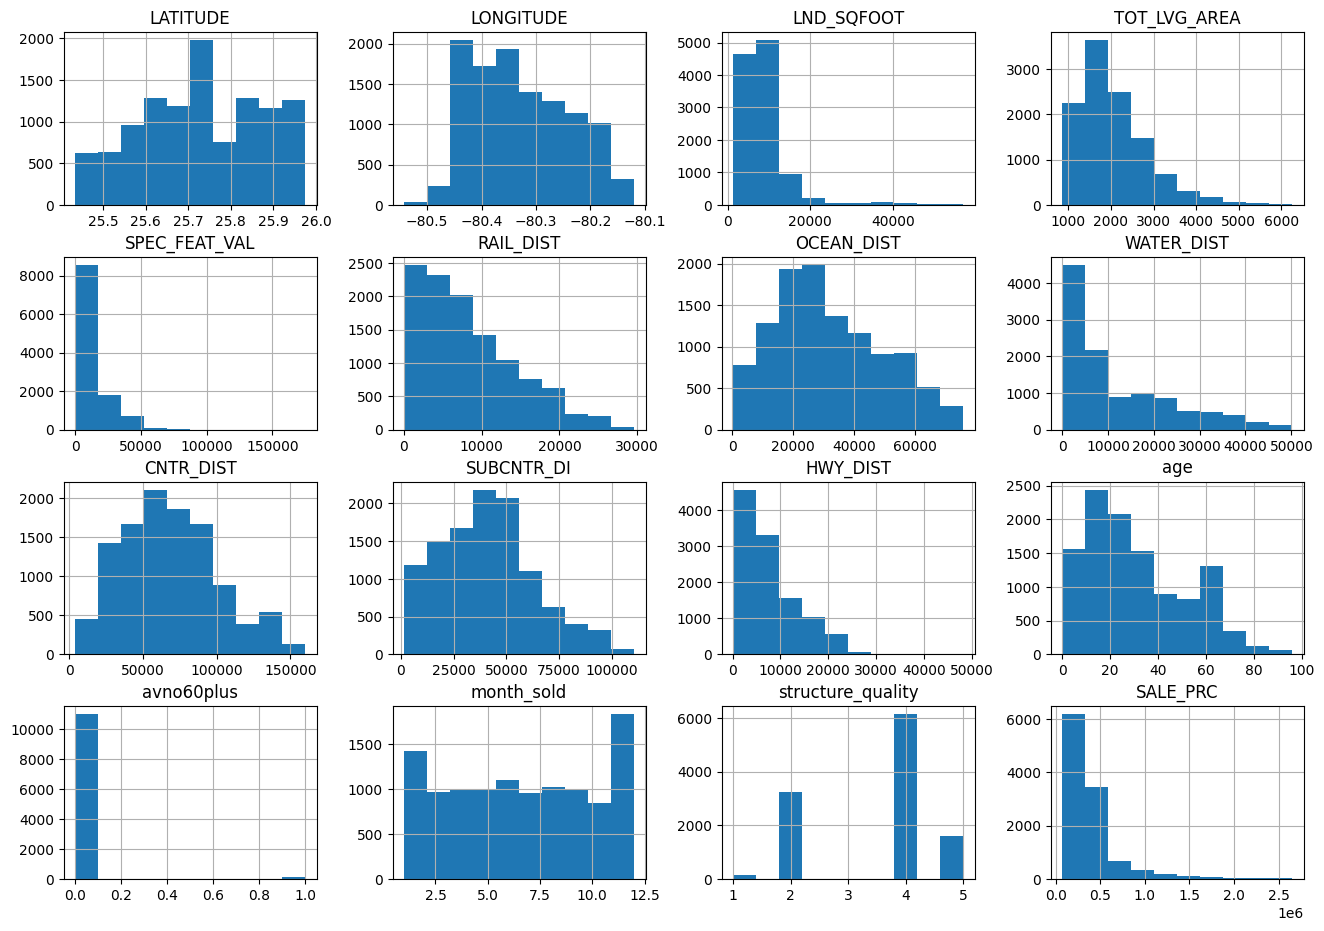

In [16]:
train_data.hist(figsize=(16,11))
plt.show()

The factors (besides longitude/latitude) below are skewed in distribution. Since I've decided on a linear regression model, I'll encourage them to follow more normal distributions using transformations.
* LND_SQFOOT 
* TOT_LVG_AREA 
* SPEC_FEAT_VAL 
* RAIL_DIST 
* WATER_DIST 
* SUBCNTR_DI
* HWY_DIST 
* AGE

#### Heatmap <a id='heatmap'></a>

Before I do that, I'll make a heatmap of these features.

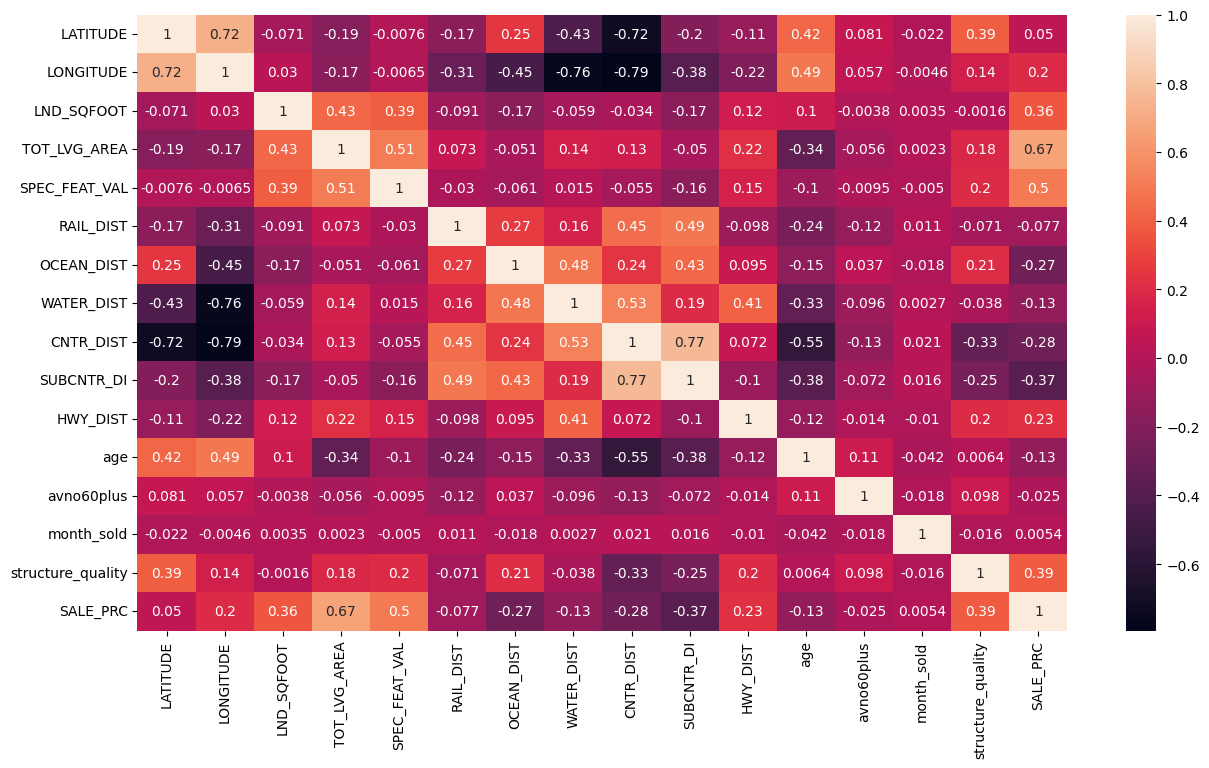

In [17]:
plt.figure(figsize = (15,8))
hm_train = sns.heatmap(train_data.corr(), annot=True)
plt.show()

### Transforming feature distribution

#### LND_SQFOOT

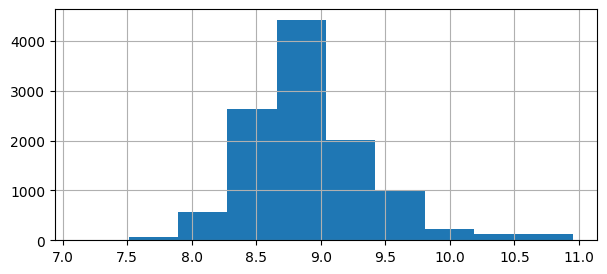

In [18]:
# LND_SQFOOT
np.log(train_data['LND_SQFOOT'] + 1).hist(figsize=(7,3))
plt.show()

#### TOT_LVG_AREA

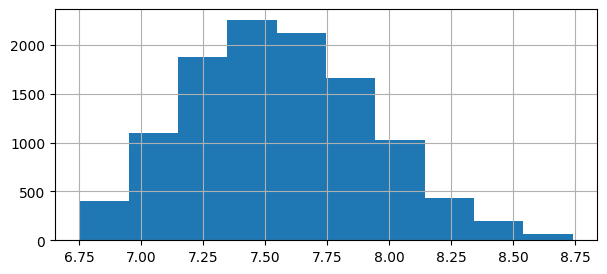

In [19]:
# TOT_LVG_AREA
np.log(train_data['TOT_LVG_AREA'] + 1).hist(figsize=(7,3))
plt.show()

#### SPEC_FEAT_VAL

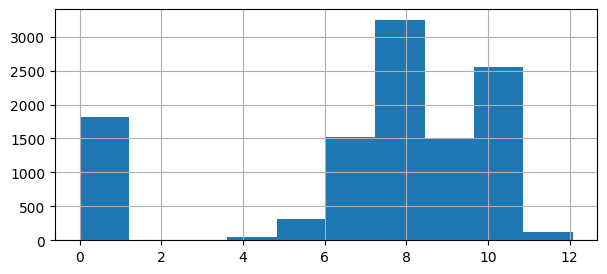

In [20]:
# SPEC_FEAT_VAL
np.log(train_data['SPEC_FEAT_VAL'] + 1).hist(figsize=(7,3))
plt.show()

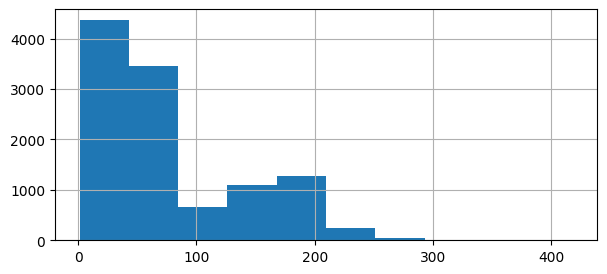

In [21]:
np.sqrt(train_data['SPEC_FEAT_VAL'] + 1).hist(figsize=(7,3))
plt.show()

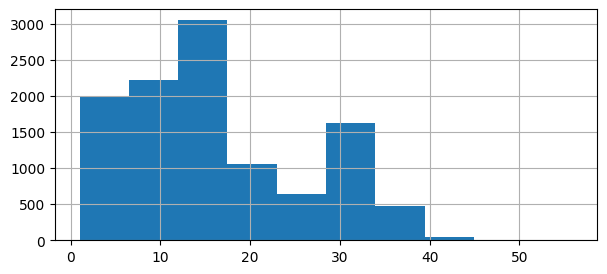

In [22]:
np.cbrt(train_data['SPEC_FEAT_VAL'] + 1).hist(figsize=(7,3))
plt.show()

Since the SPEC_FEAT_VAL data is still skewed (or too skewed for my preferences) when I try to transform it using log/sqrt/cbrt, I'll see how a Box-Cox Transformation looks.

In [23]:
bc = PowerTransformer(method='box-cox', standardize=True)

In [24]:
bc_attempt = bc.fit_transform(train_data['SPEC_FEAT_VAL'].to_numpy().reshape(-1,1) + 1)

In [25]:
# Since bc_attempt is a numpy array, convert to pandas dataframe
bc_attempt_pd = pd.DataFrame(bc_attempt)

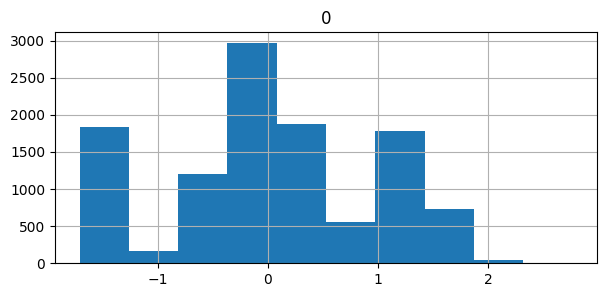

In [26]:
bc_attempt_pd.hist(figsize=(7,3))
plt.show()

This distribution using Box-Cox transformation looks better for the data!

#### RAIL_DIST

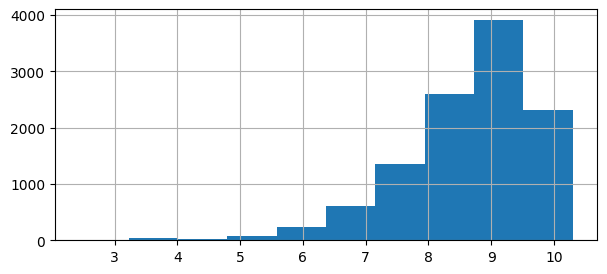

In [27]:
# RAIL_DIST
np.log(train_data['RAIL_DIST'] + 1).hist(figsize=(7,3))
plt.show()

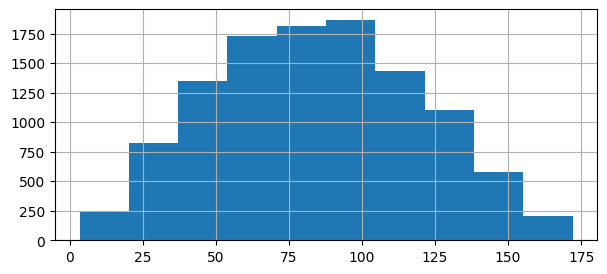

In [28]:
np.sqrt(train_data['RAIL_DIST'] + 1).hist(figsize=(7,3))
plt.show()

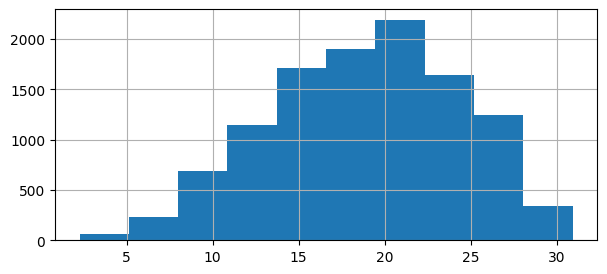

In [29]:
np.cbrt(train_data['RAIL_DIST'] + 1).hist(figsize=(7,3))
plt.show()

#### WATER_DIST

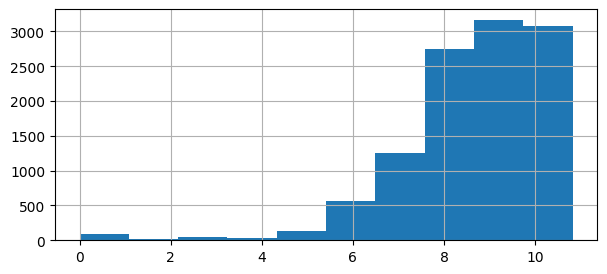

In [30]:
# WATER_DIST
np.log(train_data['WATER_DIST'] + 1).hist(figsize=(7,3))
plt.show()

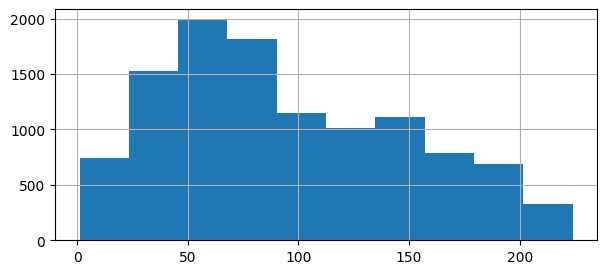

In [31]:
np.sqrt(train_data['WATER_DIST'] + 1).hist(figsize=(7,3))
plt.show()

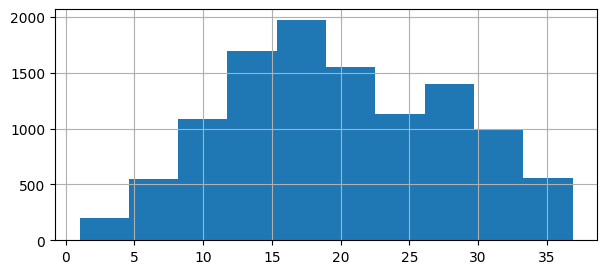

In [32]:
np.cbrt(train_data['WATER_DIST'] + 1).hist(figsize=(7,3))
plt.show()

#### SUBCNTR_DI

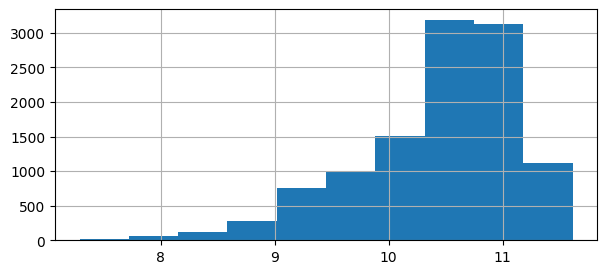

In [33]:
np.log(train_data['SUBCNTR_DI'] + 1).hist(figsize=(7,3))
plt.show()

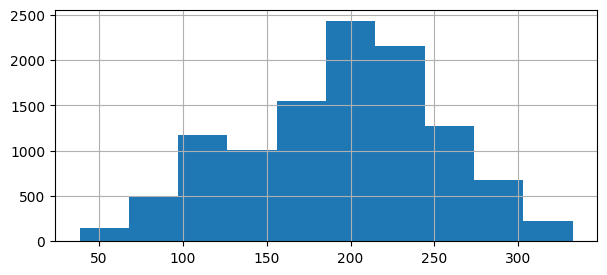

In [34]:
np.sqrt(train_data['SUBCNTR_DI'] + 1).hist(figsize=(7,3))
plt.show()

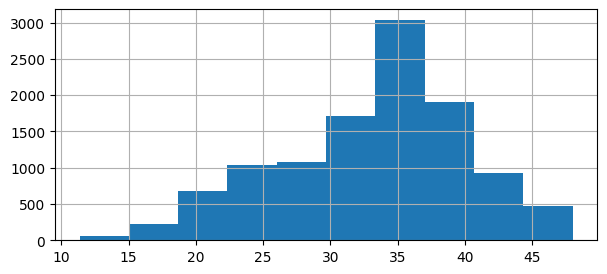

In [35]:
np.cbrt(train_data['SUBCNTR_DI'] + 1).hist(figsize=(7,3))
plt.show()

#### HWY_DIST

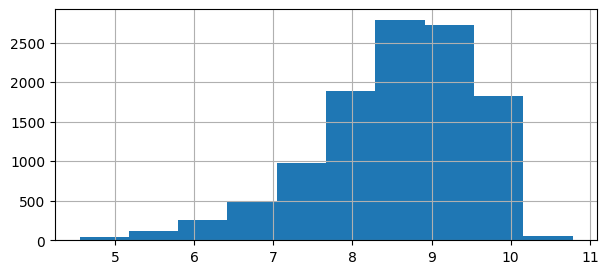

In [36]:
# HWY_DIST
np.log(train_data['HWY_DIST'] + 1).hist(figsize=(7,3))
plt.show()

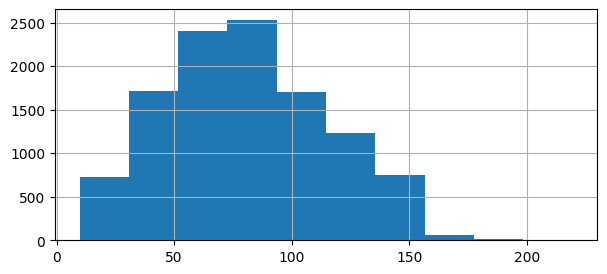

In [37]:
np.sqrt(train_data['HWY_DIST'] + 1).hist(figsize=(7,3))
plt.show()

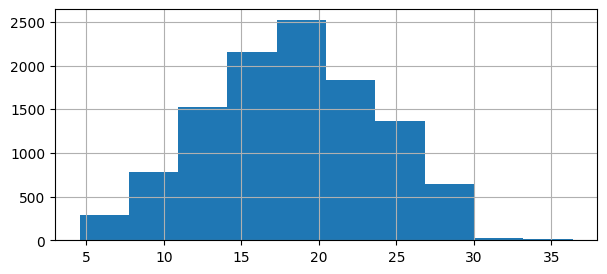

In [38]:
np.cbrt(train_data['HWY_DIST'] + 1).hist(figsize=(7,3))
plt.show()

#### age

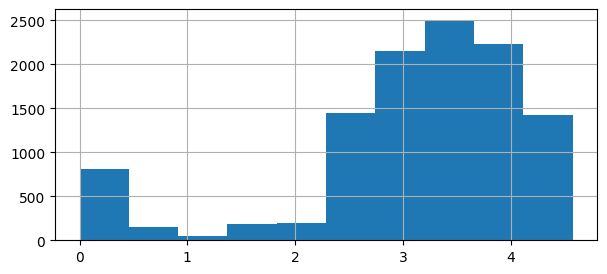

In [39]:
np.log(train_data['age'] + 1).hist(figsize=(7,3))
plt.show()

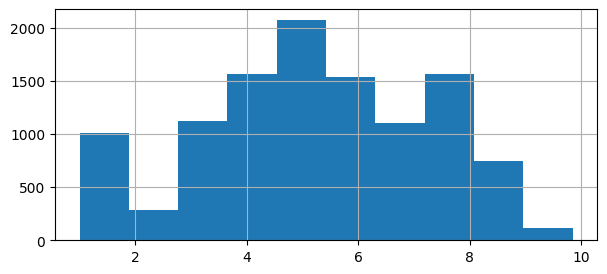

In [40]:
np.sqrt(train_data['age'] + 1).hist(figsize=(7,3))
plt.show()

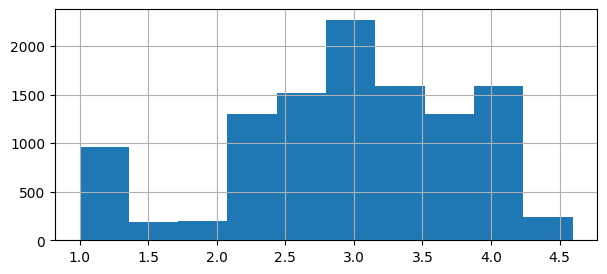

In [41]:
np.cbrt(train_data['age'] + 1).hist(figsize=(7,3))
plt.show()

The transformations I'll use:
* Log:
    * LND_SQFOOT
    * TOT_LVG_AREA
* Box-Cox: SPEC_FEAT_VAL
* Square root:
    * RAIL_DIST
    * AGE
    * SUBCNTR_DI
* Cube root:
    * WATER_DIST
    * HWY_DIST

## Applying transformed features

In [42]:
# log
train_data['LND_SQFOOT'] = np.log(train_data['LND_SQFOOT'] + 1)
train_data['TOT_LVG_AREA'] = np.log(train_data['TOT_LVG_AREA'] + 1)

# sqrt
train_data['RAIL_DIST'] = np.sqrt(train_data['RAIL_DIST'] + 1)
train_data['SUBCNTR_DI'] = np.sqrt(train_data['SUBCNTR_DI'] + 1)
train_data['age'] = np.sqrt(train_data['age'] + 1)

# cbrt
train_data['WATER_DIST'] = np.cbrt(train_data['WATER_DIST'] + 1)
train_data['HWY_DIST'] = np.cbrt(train_data['HWY_DIST'] + 1)

#### Box-cox transformation

In [43]:
train_data['SPEC_FEAT_VAL'] = bc.fit_transform(train_data['SPEC_FEAT_VAL'].to_numpy().reshape(-1,1) + 1)

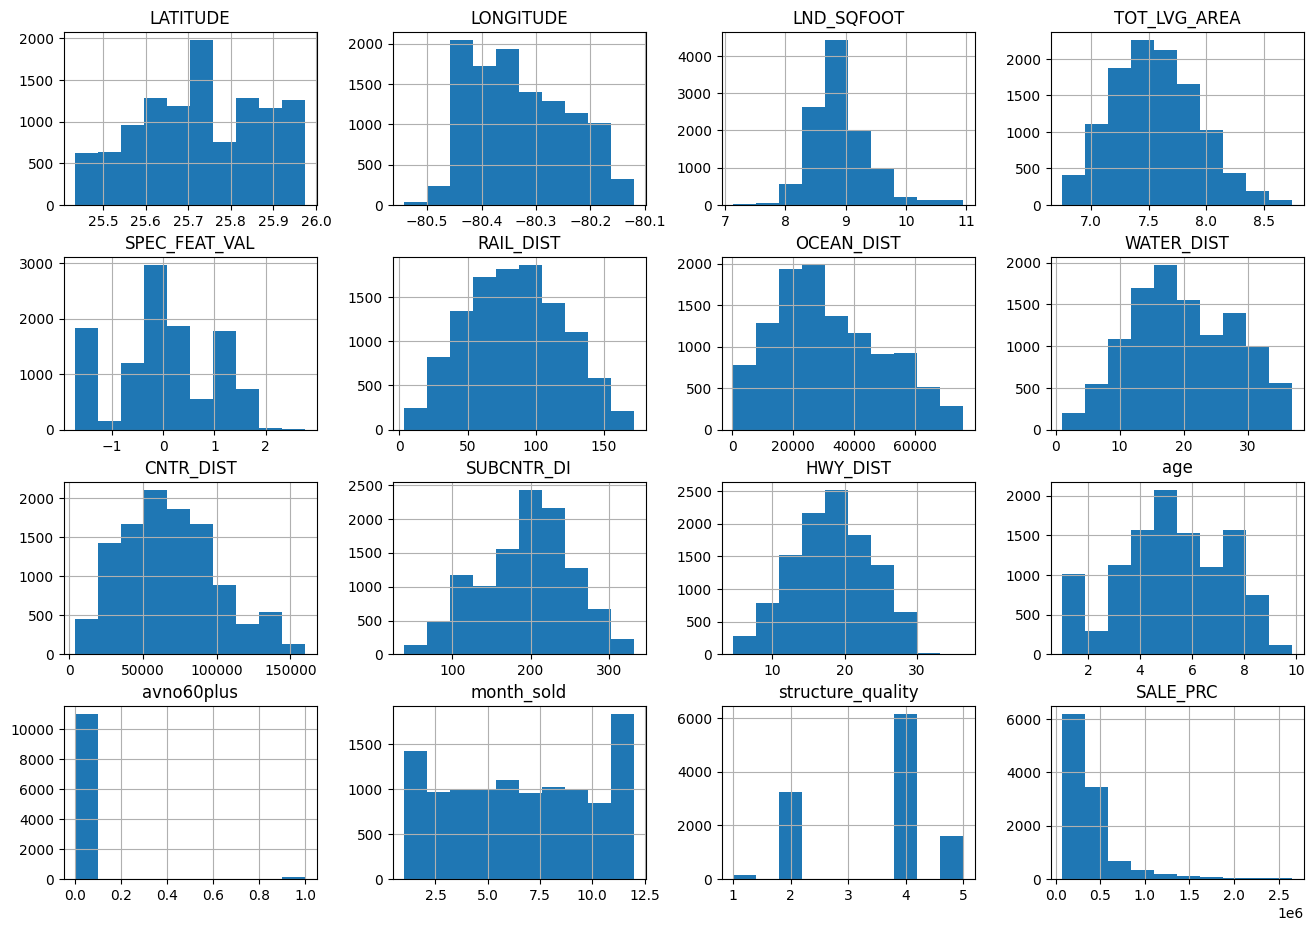

In [44]:
train_data.hist(figsize=(16,11))
plt.show()

## Linear Regression

#### X_train, y_train, LinearRegression()

In [45]:
X_train, y_train = train_data.drop(['SALE_PRC'], axis=1), train_data['SALE_PRC']

In [46]:
reg = LinearRegression()

In [47]:
reg.fit(X_train, y_train)

LinearRegression()

#### Test Data

In [48]:
test_data = X_test.join(y_test)

In [49]:
test_data

,LATITUDE,LONGITUDE,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC
12134,25.714421,-80.425473,5000,1784,0,19611.5,53194.1,34303.0,79865.1,38057.6,13776.8,22,0,5,4,318500.0
13748,25.610612,-80.419309,3858,1568,1402,329.7,36403.8,20705.4,95956.1,44886.4,13501.7,22,0,6,4,240000.0
8689,25.554057,-80.381038,6001,1735,2646,5730.8,18607.1,6077.7,101904.8,53628.2,6028.1,0,0,8,4,268000.0
2678,25.804635,-80.138776,7072,2720,4159,15717.2,4812.0,403.5,20377.3,5739.6,2336.2,90,0,2,2,415000.0
242,25.920306,-80.172314,6000,1410,546,3867.1,16767.5,2914.2,52575.8,49043.2,9410.6,36,0,1,2,165000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,25.646825,-80.304810,38855,3693,39698,8436.2,9236.3,4873.3,59778.7,15269.1,11964.5,17,0,6,5,1290000.0
6841,25.842328,-80.360820,4875,3630,29145,8087.3,58066.6,11128.6,60203.8,47560.3,8591.3,1,0,3,5,880000.0
2294,25.829036,-80.201128,4462,908,1157,4371.6,26700.9,6192.3,19186.9,19186.9,1556.1,52,0,4,1,80000.0
7363,25.952302,-80.186742,5202,2311,960,1426.8,22262.9,881.0,63032.1,61558.6,1619.9,3,0,7,5,475000.0


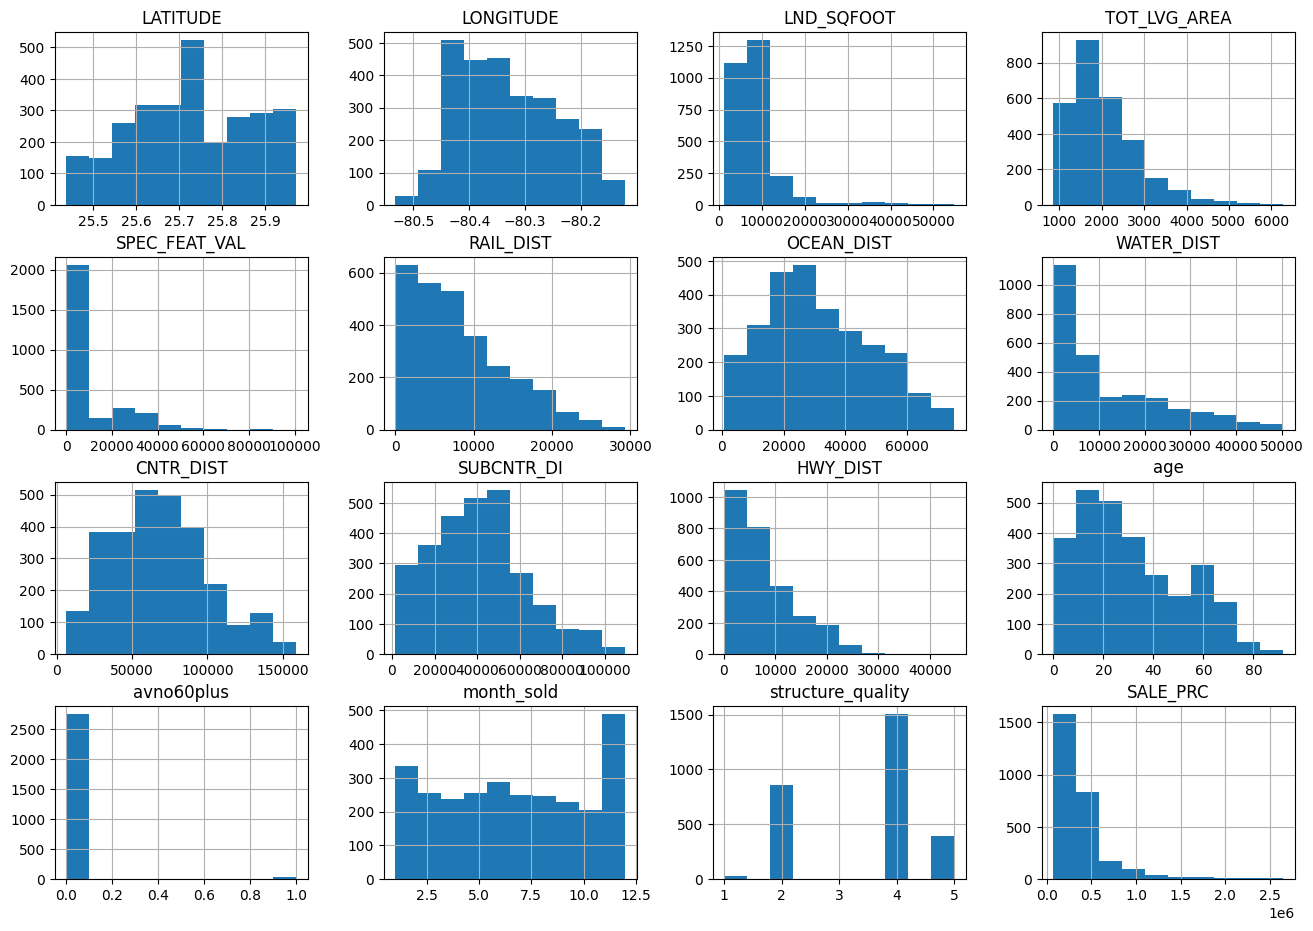

In [50]:
test_data.hist(figsize=(16,11))
plt.show()

#### Transforming test data with the same transformations as on the training data

In [51]:
# Applying the same transformations to the test data

# log
test_data['LND_SQFOOT'] = np.log(test_data['LND_SQFOOT'] + 1)
test_data['TOT_LVG_AREA'] = np.log(test_data['TOT_LVG_AREA'] + 1)

# sqrt
test_data['RAIL_DIST'] = np.sqrt(test_data['RAIL_DIST'] + 1)
test_data['SUBCNTR_DI'] = np.sqrt(test_data['SUBCNTR_DI'] + 1)
test_data['age'] = np.sqrt(test_data['age'] + 1)

# cbrt
test_data['WATER_DIST'] = np.cbrt(test_data['WATER_DIST'] + 1)
test_data['HWY_DIST'] = np.cbrt(test_data['HWY_DIST'] + 1)

In [52]:
test_data['SPEC_FEAT_VAL'] = bc.fit_transform(test_data['SPEC_FEAT_VAL'].to_numpy().reshape(-1,1) + 1)

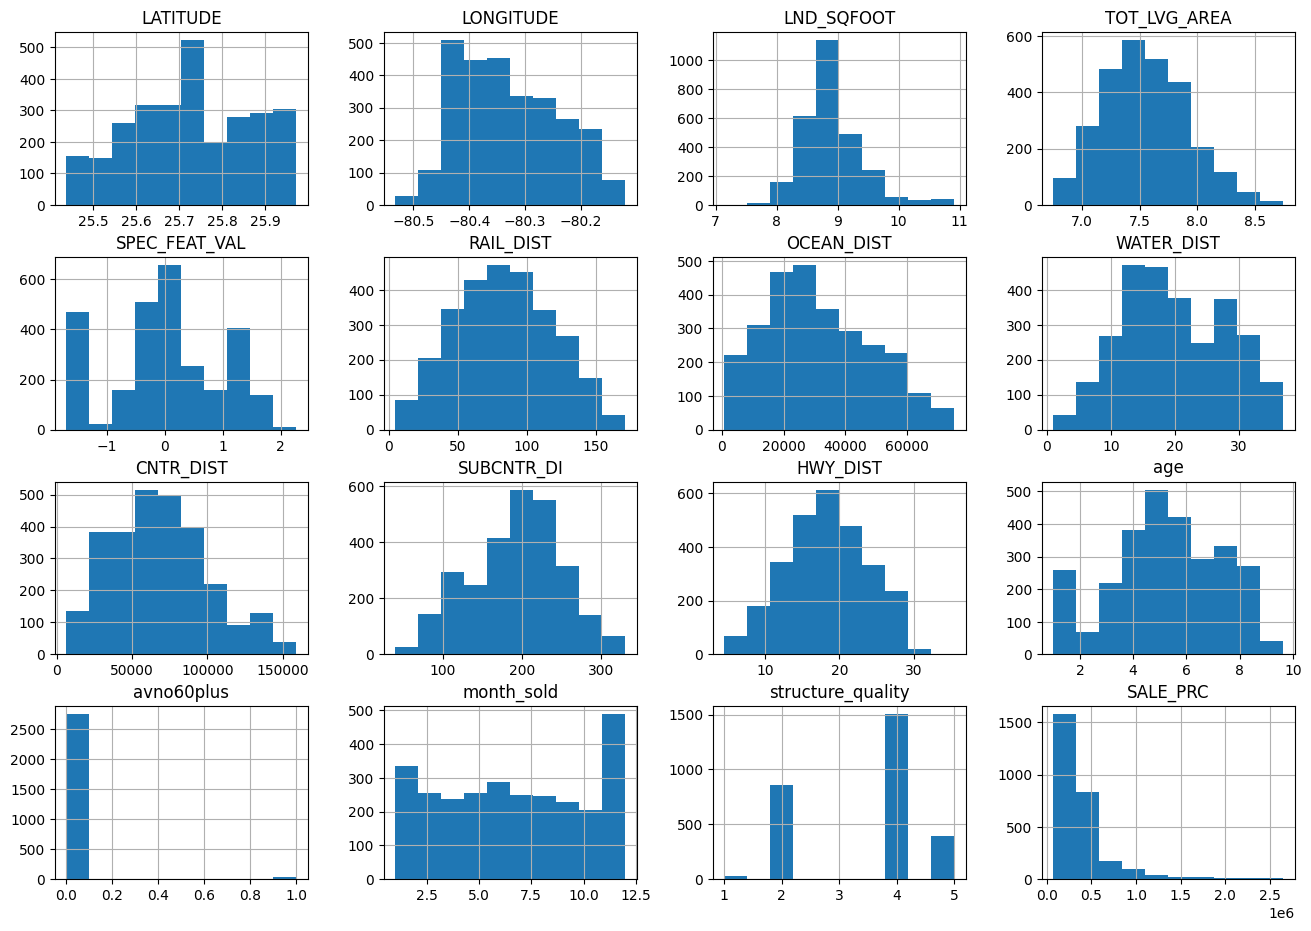

In [53]:
test_data.hist(figsize=(16,11))
plt.show()

## R<sup>2</sup> score, Predictions

In [54]:
y_pred = reg.predict(test_data.drop(['SALE_PRC'], axis=1))

In [55]:
r2_score = reg.score(test_data.drop(['SALE_PRC'], axis=1), y_test)

In [56]:
print(f'R^2 SCORE: {r2_score}')

R^2 SCORE: 0.656985113774814


For personal purposes, I'm printing out my model's first 10 comparisons between the predicted and actual Miami housing prices.

In [57]:
for i in range(10):
    print(f'Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}')

Predicted: 256491.94834035635, Actual: 318500.0
Predicted: 197335.43651765585, Actual: 240000.0
Predicted: 421925.62100827694, Actual: 268000.0
Predicted: 914006.7116619349, Actual: 415000.0
Predicted: 177333.82167112827, Actual: 165000.0
Predicted: 789995.9097805023, Actual: 469000.0
Predicted: 399765.885394454, Actual: 370000.0
Predicted: 439538.4796076417, Actual: 250000.0
Predicted: 601049.8354418278, Actual: 265000.0
Predicted: 285208.04720282555, Actual: 364000.0


### Scatterplot: Predicted vs. Actual

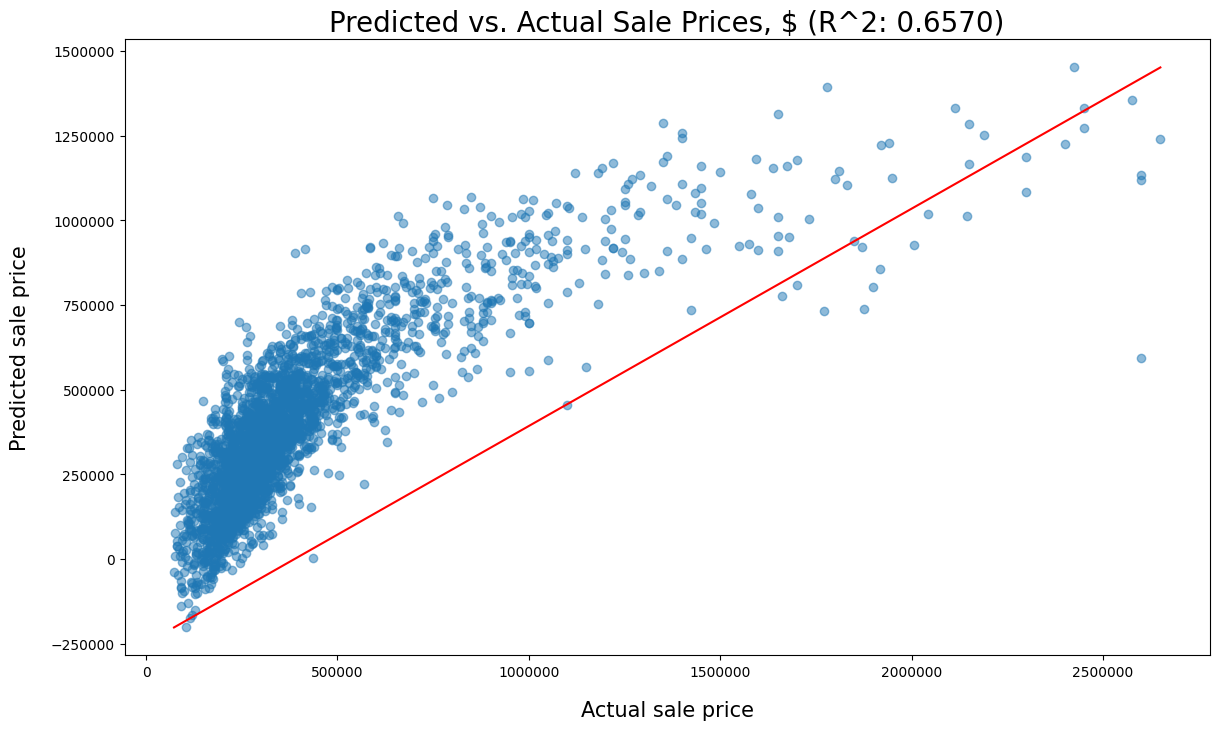

In [58]:
plt.figure(figsize=(14,8))
plt.scatter(y_test, y_pred, alpha=.5)

# preventing scientific notation
plt.ticklabel_format(style='plain')

# line of best fit
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)],
        color='red')

# adding commas to large numbers

plt.xlabel('Actual sale price', fontsize=15, labelpad=15)
plt.ylabel('Predicted sale price', fontsize=15, labelpad=15)
plt.title('Predicted vs. Actual Sale Prices, $ (R^2: {:.4f})'.format(r2_score), fontsize=20)
# adding r^2 for reference to title


plt.show()

### Summary

With R<sup>2</sup> ~ 0.6570, the following factors considered by my linear regression model accounts for approximately 65.70% of variance in sale price: 

* land and floor area (sq. ft.)
* cost of special features ($)
* distance to the closest train, sea, body of water, central business district in Miami, subcenter, and highway (ft.)
* age of structure (yrs.)
* airplane noise 
* quality of structure
* month sold, and
* latitude and longitude.

While such an R<sup>2</sup> value shows that the predicted and actual sale prices fit moderately well (R<sup>2</sup> > 0.5), we can still improve it (closer to 1).

#### Suggestions for improving predictions

Recall the [heatmap](#heatmap) of my training dataframe. 

Two features, CNTR_DIST and SUBCNTR_DI, have a high correlation of 0.77. Plus, both deal with distance from prominent areas (CNTR_DIST for the Miami central business district, SUBCNTR_DI for the closest subcenter). I could consider feature-engineering with these factors for my next model, possibly by dividing the values in SUBCNTR_DI by those in CNTR_DIST, then assigning these ratios to a new feature column.